<a href="https://colab.research.google.com/github/ramirezabd/FuzzyTest/blob/master/Tubes_Fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[link text](https://)**[LINK Coding](https://scikit-fuzzy.readthedocs.io/en/latest/auto_examples/plot_tipping_problem.html)**

**[LINK CENTROID](https://tutorkeren.com/artikel/defuzzification.htm)**


Input
Curah hujan
	low
	medium
	high
durasi
	low
	medium
	high
debit
	low
	medium
	high


output
prob
	low
	medium
	high


Rule
1#Curah low,Durasi low,Debit low,Then Prob low
2#Curah low,Durasi low,Debit med,Then Prob low

3#Curah low,Durasi low,Debit med,Then Prob med
4#Curah med,Durasi med,Debit med,Then Prob med

5#Curah med,Durasi high,Debit high,Then Prob high
6#Curah high,Durasi high,Debit high,Then Prob high

In [0]:
pip install scikit-fuzzy

     |████████████████████████████████| 1.0MB 8.8MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp36-none-any.whl size=894069 sha256=7eff3a8dbc3003ca7d4bf2856b6e78eeeece53c035531397d34cd504e61df753
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


In [0]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [0]:
x_curah = np.arange(0, 10, 1)
x_durasi = np.arange(0, 10, 1)
x_debit  = np.arange(0, 10, 1)
x_prob  = np.arange(0, 19, 1)

In [0]:
curah_lo = fuzz.trimf(x_curah, [0, 0, 3])
curah_md = fuzz.trimf(x_curah, [0, 3, 6])
curah_hi = fuzz.trimf(x_curah, [3, 6, 9])
durasi_lo = fuzz.trimf(x_durasi, [0, 0, 3])
durasi_md = fuzz.trimf(x_durasi, [0, 3, 6])
durasi_hi = fuzz.trimf(x_durasi, [3, 6, 9])
debit_lo = fuzz.trimf(x_debit, [0, 0, 3])
debit_md = fuzz.trimf(x_debit, [0, 3, 6])
debit_hi = fuzz.trimf(x_debit, [3, 6, 9])
prob_lo = fuzz.trimf(x_prob, [0, 0, 6])
prob_md = fuzz.trimf(x_prob, [0, 6, 12])
prob_hi = fuzz.trimf(x_prob, [6, 12, 18])

In [0]:
# We need the activation of our fuzzy membership functions at these values.
# The exact values 6.5 and 9.8 do not exist on our universes...
# This is what fuzz.interp_membership exists for!
curah_level_lo = fuzz.interp_membership(x_curah, curah_lo, 3.5)
curah_level_md = fuzz.interp_membership(x_curah, curah_md, 3.5)
curah_level_hi = fuzz.interp_membership(x_curah, curah_hi, 3.5)

durasi_level_lo = fuzz.interp_membership(x_durasi, durasi_lo, 6.0)
durasi_level_md = fuzz.interp_membership(x_durasi, durasi_md, 6.0)
durasi_level_hi = fuzz.interp_membership(x_durasi, durasi_hi, 6.0)

debit_level_lo = fuzz.interp_membership(x_debit, debit_lo, 6.0)
debit_level_md = fuzz.interp_membership(x_debit, debit_md, 6.0)
debit_level_hi = fuzz.interp_membership(x_debit, debit_hi, 6.0)


curah_durasi_lo12 = np.fmax(curah_level_lo, durasi_level_lo)
active_rule1 = np.fmax(curah_durasi_lo12, debit_level_lo)
active_rule2 = np.fmax(curah_durasi_lo12, debit_level_md)
prob_activation_lo1 = np.fmin(active_rule1, prob_lo)
prob_activation_lo2 = np.fmin(active_rule2, prob_lo)


curah_durasi_md34 = np.fmax(curah_level_md, durasi_level_md)
active_rule3 = np.fmax(curah_durasi_md34, debit_level_md)
active_rule4 = np.fmax(curah_durasi_md34, debit_level_hi)
prob_activation_md3 = np.fmin(active_rule3, prob_md)
prob_activation_md4 = np.fmin(active_rule4, prob_md)


curah_durasi_hi56 = np.fmax(curah_level_hi, durasi_level_hi)
active_rule5 = np.fmax(curah_durasi_hi56, debit_level_md)
active_rule6 = np.fmax(curah_durasi_hi56, debit_level_hi)
prob_activation_hi5 = np.fmin(active_rule5, prob_hi)
prob_activation_hi6 = np.fmin(active_rule6, prob_hi)

prob0 = np.zeros_like(x_prob)


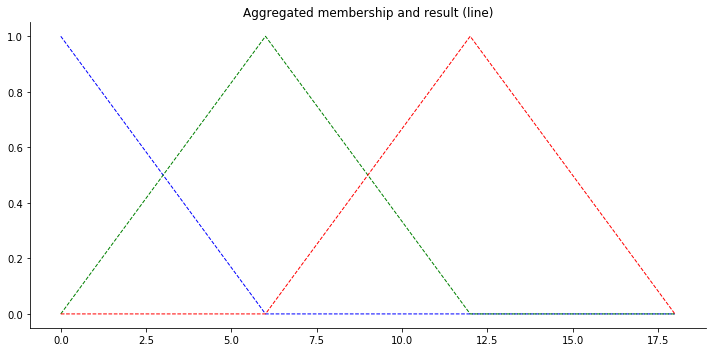

In [0]:
# Aggregate all three output membership functions together

prob_md34 = np.fmax(prob_activation_md3, prob_activation_md4)
prob_hi56 = np.fmax(prob_activation_hi5, prob_activation_hi6)
aggregated = np.fmax(prob_activation_lo1, prob_activation_lo2,
                     np.fmax(prob_md34, prob_hi56))

# Calculate defuzzified result
prob = fuzz.defuzz(x_prob, aggregated, 'lom')
prob_activation = fuzz.interp_membership(x_prob, aggregated, prob)  # for plot

# Visualize this
fig, ax0 = plt.subplots(figsize=(10, 5))

ax0.plot(x_prob, prob_lo, 'b', linewidth=1, linestyle='--', )
ax0.plot(x_prob, prob_md, 'g', linewidth=1, linestyle='--')
ax0.plot(x_prob, prob_hi, 'r', linewidth=1, linestyle='--')
ax0.fill_between(x_prob, prob0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([prob, prob], [0, prob_activation], 'k', linewidth=2.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()


In [0]:
prob

18

In [0]:
prob_activation

0.0